In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('data/advertising_ef.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [5]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [6]:
data.rename(columns = {'Daily Time Spent on Site':'Daily_Spent_on_Site'}, inplace = True)

In [7]:
data['Daily_Spent_on_Site'].fillna(data['Daily_Spent_on_Site'].median(),inplace = True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)
data["Area Income"] = np.around(data['Area Income'], decimals = 2)
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)
data.isna().sum()

Daily_Spent_on_Site     0
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Gender                  0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64

<AxesSubplot:>

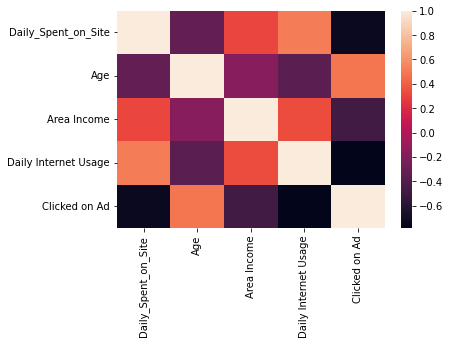

In [8]:
sns.heatmap(data.corr())

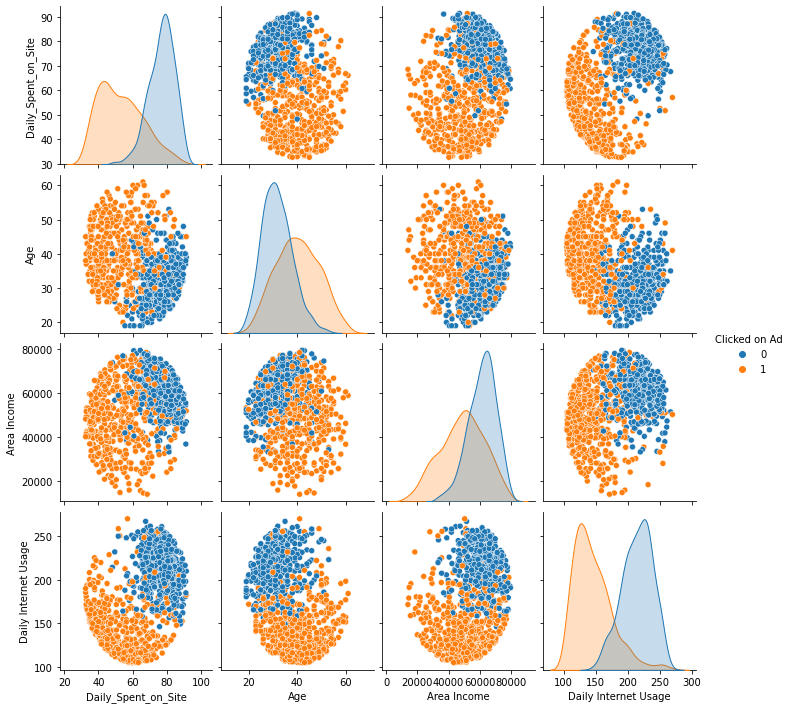

In [9]:
sns.pairplot(data,hue = 'Clicked on Ad')

In [10]:
#Unique numbers
object_Dtype = ['Ad Topic Line','City','Country']
data[object_Dtype].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


In [11]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'],axis = 1)

In [12]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [13]:
data.head()

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,3


<AxesSubplot:>

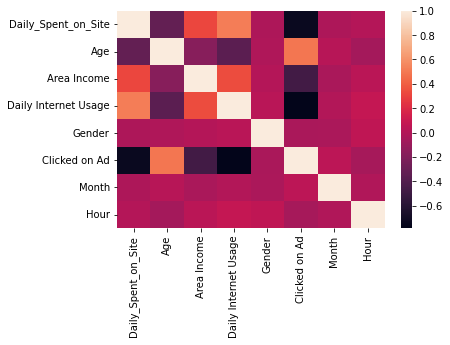

In [14]:
sns.heatmap(data.corr())

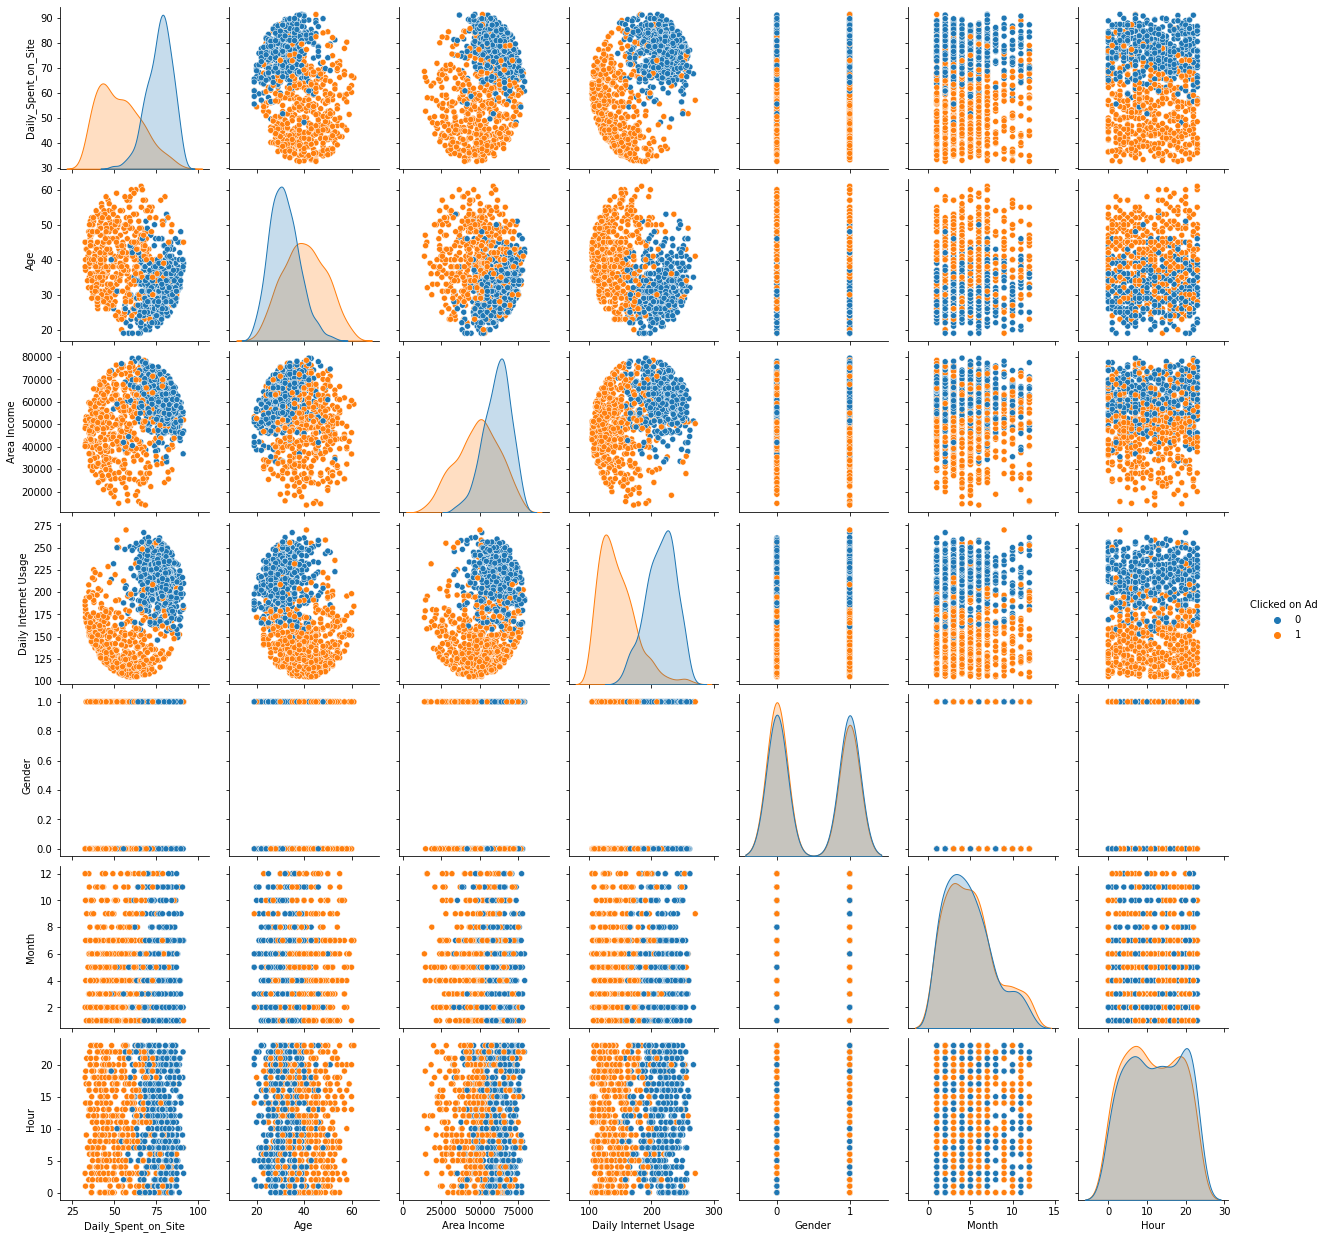

In [15]:
sns.pairplot(data, hue = 'Clicked on Ad')

In [16]:
data.dtypes

Daily_Spent_on_Site     float64
Age                     float64
Area Income             float64
Daily Internet Usage    float64
Ad Topic Line            object
City                     object
Gender                    int32
Country                  object
Clicked on Ad             int64
Month                     int64
Hour                      int64
dtype: object

In [17]:
# Make a copy of the data
data_encoded = data.copy()

# Select the categorical columns to encode
cat_columns = ['Ad Topic Line', 'City', 'Country']

# Use the get_dummies function to one-hot encode the categorical columns
data_encoded = pd.get_dummies(data_encoded, columns=cat_columns)

In [24]:
data_encoded

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Hour,Ad Topic Line_Adaptive 24hour Graphic Interface,Ad Topic Line_Adaptive asynchronous attitude,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35.0,61833.90,256.09,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68.37,31.0,68441.85,193.77,1,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26.0,59785.94,236.50,0,0,3,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29.0,54806.18,245.89,1,0,10,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35.0,73889.99,225.58,0,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,1,1,11,21,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,51.30,45.0,67782.17,134.42,1,1,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,51.63,51.0,42415.72,120.37,1,1,1,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,55.55,19.0,41920.79,187.95,0,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_encoded.to_csv('data/data_encoded.csv',index=False, header=True)
